### Housing Prices

Using this Kaggle data create a model to predict a house's value. We want to be able to understand what creates value in a house, as though we were a real estate developer.

In [1]:

#importing modules and potential modules
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import random


from sklearn import ensemble
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv(r"C:\Users\genta\Desktop\Thinkful\SupervisedLearning\Datasets\Melbourne_housing_FULL.csv")

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
#change spelling of Lattitude to Latitude and Longtitude to Longitude

df.rename(columns={'Lattitude' : 'Latitude'}, inplace=True)

df.rename(columns={'Longtitude' : 'Longitude'}, inplace=True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Latitude         26881 non-null float64
Longitude        26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Latitude         26881 non-null float64
Longitude        26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [7]:
# Count of missing values
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Latitude          7976
Longitude         7976
Regionname           3
Propertycount        3
dtype: int64

In [8]:
# Identify object columns
print(df.select_dtypes(['object']).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [9]:
#convert object columns to categories.

objtocat= ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']


for colname in objtocat:
    df[colname] = df[colname].astype('category')  

In [10]:
#covert date column to datetime column

df["Date"] = pd.to_datetime(df["Date"],dayfirst=True)

In [11]:
# Convert numeric variables to categorical
numtocat = ['Postcode']  

for colname in numtocat:
    df[colname] = df[colname].astype('category')   

# Confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null category
Address          34857 non-null category
Rooms            34857 non-null int64
Type             34857 non-null category
Price            27247 non-null float64
Method           34857 non-null category
SellerG          34857 non-null category
Date             34857 non-null datetime64[ns]
Distance         34856 non-null float64
Postcode         34856 non-null category
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null category
Latitude         26881 non-null float64
Longitude        26881 non-null float64
Regionname       34854 non-null category
Propertycount    34854 non-null float64
dtypes: category(8), datetime64[ns](1)

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965284e+03,37.313335,1196.00000,1940.00000,1970.0000,2.000000e+03,2.019000e+03
Latitude,26881.0,-3.781063e+01,0.090279,-38.19043,-37.86295,-37.8076,-3.775410e+01,-3.739020e+01


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null category
Address          34857 non-null category
Rooms            34857 non-null int64
Type             34857 non-null category
Price            27247 non-null float64
Method           34857 non-null category
SellerG          34857 non-null category
Date             34857 non-null datetime64[ns]
Distance         34856 non-null float64
Postcode         34856 non-null category
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null category
Latitude         26881 non-null float64
Longitude        26881 non-null float64
Regionname       34854 non-null category
Propertycount    34854 non-null float64
dtypes: category(8), datetime64[ns](1)

In [14]:
df = df.drop(['Bedroom2'],1)

In [15]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-09-03,2.5,3067.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-02-04,2.5,3067.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [16]:
# Add age variable
df['Age'] = 2018 - df['YearBuilt']

# Create House Age feature
df['Agefeat'] = np.where(df['Age']>=50,'Older','Contemporary')

# Convert to Category
df['Agefeat'] = df['Agefeat'].astype('category')

In [17]:
df.head(4)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,Regionname,Propertycount,Age,Agefeat
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-09-03,2.5,3067.0,...,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,NaN,Contemporary
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,...,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,NaN,Contemporary
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,118.0,Older
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-02-04,2.5,3067.0,...,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,NaN,Contemporary


In [18]:
#fix numerous null values

df= df.dropna()
df.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,Regionname,Propertycount,Age,Agefeat
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,118.0,Older
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,...,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,118.0,Older


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 22 columns):
Suburb           8887 non-null category
Address          8887 non-null category
Rooms            8887 non-null int64
Type             8887 non-null category
Price            8887 non-null float64
Method           8887 non-null category
SellerG          8887 non-null category
Date             8887 non-null datetime64[ns]
Distance         8887 non-null float64
Postcode         8887 non-null category
Bathroom         8887 non-null float64
Car              8887 non-null float64
Landsize         8887 non-null float64
BuildingArea     8887 non-null float64
YearBuilt        8887 non-null float64
CouncilArea      8887 non-null category
Latitude         8887 non-null float64
Longitude        8887 non-null float64
Regionname       8887 non-null category
Propertycount    8887 non-null float64
Age              8887 non-null float64
Agefeat          8887 non-null category
dtypes: category(9),

Text(0.5, 1.0, 'Variable Correlation')

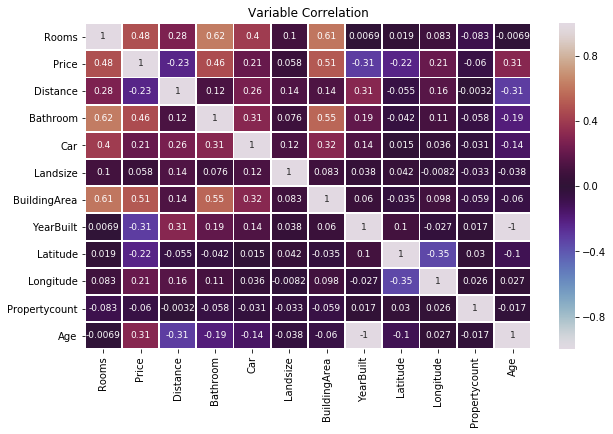

In [20]:
#Correlations

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap = 'twilight',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

In [21]:
from sklearn.preprocessing import LabelEncoder
df=df.apply(LabelEncoder().fit_transform)

In [22]:
df.dtypes

Suburb           int32
Address          int32
Rooms            int64
Type             int32
Price            int64
Method           int32
SellerG          int32
Date             int64
Distance         int64
Postcode         int64
Bathroom         int64
Car              int64
Landsize         int64
BuildingArea     int64
YearBuilt        int64
CouncilArea      int32
Latitude         int64
Longitude        int64
Regionname       int32
Propertycount    int64
Age              int64
Agefeat          int32
dtype: object

In [23]:
#setting up the X and Y for regressions
X=df.drop(['Price', 'YearBuilt'],1)
Y=df.Price

In [24]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)


In [25]:
#linear Regression
from sklearn.linear_model import LinearRegression

lirg= LinearRegression()

# Fit model to training data
lirg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
print("Accuracy of Linear Regression:", lirg.score(X_test, Y_test))

Accuracy of Linear Regression: 0.7967784158333853


In [27]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=1000)
#fitting
rfc.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [28]:
print("Accuracy of Random Forest:", rfc.score(X_test, Y_test)*100)

Accuracy of Random Forest: 89.58199970155664


In [29]:
#finding important features with RF
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [30]:
#top features
feature_importances.importance.head(22)

BuildingArea     0.315462
Age              0.131376
Latitude         0.128608
Distance         0.128326
Longitude        0.092277
Postcode         0.043939
Type             0.034856
Landsize         0.030589
Rooms            0.017540
Date             0.013101
CouncilArea      0.011273
Bathroom         0.010995
Address          0.010020
Propertycount    0.008423
Suburb           0.006896
SellerG          0.006728
Car              0.003577
Method           0.003540
Regionname       0.001634
Agefeat          0.000838
Name: importance, dtype: float64

In [31]:
predictions = lirg.predict(X_test)

(2000, 500)

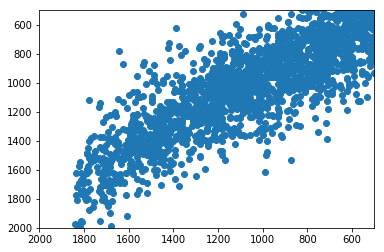

In [32]:
plt.scatter(Y_test, predictions)
plt.ylim([2000,500])
plt.xlim([2000,500])

(2000, 500)

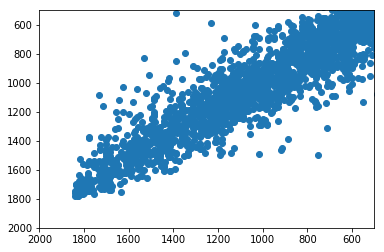

In [34]:
rfcpredictions = rfc.predict(X_test)
plt.scatter(Y_test, rfcpredictions)
plt.ylim([2000,500])
plt.xlim([2000,500])

In [35]:
#Redo both with top 10 features to see if there is a change in both LIRG and RFC

X=df[['BuildingArea','Age', 'Latitude','Distance', 'Postcode','Type','Landsize','Rooms', 'Date']]
Y=df.Price

In [36]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)


In [37]:
newlirg= LinearRegression()

# Fit model to training data
newlirg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
print("Accuracy of Linear Regression:", newlirg.score(X_test, Y_test))

Accuracy of Linear Regression: 0.7607414530184216


In [39]:
newrfc = RandomForestRegressor(n_estimators=1000)
#fitting
newrfc.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [41]:
print("Accuracy of Random Forest:", newrfc.score(X_test, Y_test)*100)

Accuracy of Random Forest: 89.24029046833493


(2000, 500)

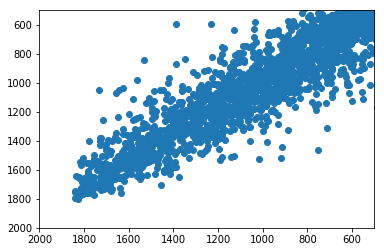

In [42]:
newrfcpredictions = newrfc.predict(X_test)
plt.scatter(Y_test, newrfcpredictions)
plt.ylim([2000,500])
plt.xlim([2000,500])

As the values in X go up so does the values in Y.